In [1]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import metrics
train = pd.read_csv(r'C:\Users\Aaron\train.csv')
test = pd.read_csv(r'C:\Users\Aaron\test.csv')

In [2]:
begin_time = datetime.datetime.now()

y_train = train['label']
X_train = train.drop('label',axis=1)

y_test = train['label']
X_test = train.drop('label',axis=1)

#lab_enc = preprocessing.LabelEncoder()

#y_train = lab_enc.fit_transform(y_train)
#y_test = lab_enc.fit_transform(y_test)
rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True ,random_state=45)
rf_model = rf_Model.fit(X_train,y_train)

print(datetime.datetime.now() - begin_time)

0:00:02.499349


In [3]:
begin_time = datetime.datetime.now()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_test, y_test, cv=5)
display(scores.mean())
display(scores.std())

print(datetime.datetime.now() - begin_time)


0.9402624814122753

0.0021943311686954316

0:00:09.728990


In [4]:
# Save Classifier for Kaggle
X_test = test
#pd.DataFrame(rf_model.predict(X_test)).to_csv('RFC_First.csv')

In [5]:
# Principal Component Analysis
x = X_test.append(X_train)

pca =PCA(n_components = 20)
pca.fit(x)
pca_data = pca.transform(x)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)


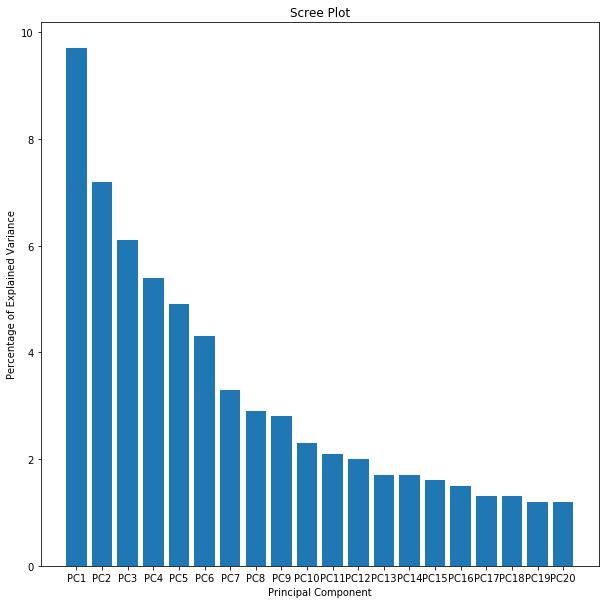

In [6]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]


plt.figure(figsize=(10,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [7]:
# How many eigen values to use?
pixel = ['pixel' + str(i) for i in range (0,784)]
pixel
loading_scores = pd.Series(pca.components_[0], index=pixel)
loading_scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_pixels = sorted_loading_scores[0:20].index.values
top_10_pixels

array(['pixel523', 'pixel550', 'pixel551', 'pixel495', 'pixel578',
       'pixel496', 'pixel577', 'pixel468', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel428', 'pixel400',
       'pixel456', 'pixel549', 'pixel483', 'pixel568', 'pixel455'],
      dtype=object)

In [8]:
# 20 variable Classifier
begin_time = datetime.datetime.now()
y_train = train['label']
X_train = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455']]
rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True ,random_state=45)
rf_model = rf_Model.fit(X_train,y_train)

print(datetime.datetime.now() - begin_time)

0:00:00.565488


In [9]:
# Save classifier
X_test_20 = test[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455']]
#pd.DataFrame(rf_model.predict(X_test_20)).to_csv('RFC_2OV.csv')
#58.5% accuracy. Values with eigen values greater than 1

In [10]:
#10 variable Classifier
begin_time = datetime.datetime.now()
y_train1 = train['label']
X_train1 = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524']]
rf_Model1 = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True ,random_state=45)
rf_model1 = rf_Model1.fit(X_train1,y_train1)

print(datetime.datetime.now() - begin_time)


0:00:00.423891


In [11]:
# Save Classifier
X_test_10 = test[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524']]
#pd.DataFrame(rf_model1.predict(X_test_10)).to_csv('RFC_1OV.csv')
#38.8% accuracy

In [12]:
# Doing it the right way
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

x = train.drop('label',axis=1)

# Standard Scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(x)
scaled_data = scaler.transform(x) #May need to transpose? df.T
scaled_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# PCA Analysis

pca =PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

In [14]:
# Use to identify the top X Principal Components

pixel = ['pixel' + str(i) for i in range (0,784)]
pixel
loading_scores = pd.Series(pca.components_[0], index=pixel)
loading_scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_684_pixels = sorted_loading_scores[0:684].index.values
top_684_pixels

array(['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455',
       'pixel540', 'pixel511', 'pixel549', 'pixel384', 'pixel512',
       'pixel372', 'pixel539', 'pixel441', 'pixel605', 'pixel439',
       'pixel427', 'pixel469', 'pixel597', 'pixel413', 'pixel596',
       'pixel579', 'pixel345', 'pixel567', 'pixel356', 'pixel385',
       'pixel552', 'pixel569', 'pixel344', 'pixel411', 'pixel317',
       'pixel373', 'pixel357', 'pixel497', 'pixel399', 'pixel604',
       'pixel494', 'pixel328', 'pixel329', 'pixel576', 'pixel462',
       'pixel434', 'pixel606', 'pixel383', 'pixel401', 'pixel300',
       'pixel208', 'pixel290', 'pixel598', 'pixel318', 'pixel289',
       'pixel207', 'pixel301', 'pixel371', 'pixel181', 'pixel180',
       'pixel541', 'pixel316', 'pixel235', 'pixel595', 'pixel2

In [15]:
begin_time = datetime.datetime.now()


# 20 variables
X = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455']]
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True)
rf_model = rf_Model.fit(X_train,y_train)


print(datetime.datetime.now() - begin_time)

0:00:00.383973


In [16]:
# 20 variables cross val
begin_time = datetime.datetime.now()

scores = cross_val_score(rf_model, X_test, y_test, cv=5)
display(scores.mean())
display(scores.std())

print(datetime.datetime.now() - begin_time)

0.5188108025360154

0.008280450591291733

0:00:00.611371


In [17]:
#40 top variables
begin_time = datetime.datetime.now()
X = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455',
       'pixel540', 'pixel511', 'pixel549', 'pixel384', 'pixel512',
       'pixel372', 'pixel539', 'pixel441', 'pixel605', 'pixel439',
       'pixel427', 'pixel469', 'pixel597', 'pixel413', 'pixel596',
       'pixel579', 'pixel345', 'pixel567', 'pixel356', 'pixel385']]
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True)
rf_model = rf_Model.fit(X_train,y_train)

print(datetime.datetime.now() - begin_time)

0:00:00.508615


In [18]:
# 40 variables cross val
begin_time = datetime.datetime.now()
scores = cross_val_score(rf_model, X_test, y_test, cv=5)
display(scores.mean())
display(scores.std())
print(datetime.datetime.now() - begin_time)

0.6407932969874518

0.004752296721457699

0:00:00.789863


In [19]:
#60 top variables
begin_time = datetime.datetime.now()
X = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455',
       'pixel540', 'pixel511', 'pixel549', 'pixel384', 'pixel512',
       'pixel372', 'pixel539', 'pixel441', 'pixel605', 'pixel439',
       'pixel427', 'pixel469', 'pixel597', 'pixel413', 'pixel596',
       'pixel579', 'pixel345', 'pixel567', 'pixel356', 'pixel385',
       'pixel552', 'pixel569', 'pixel344', 'pixel411', 'pixel317',
       'pixel373', 'pixel357', 'pixel497', 'pixel399', 'pixel604',
       'pixel494', 'pixel328', 'pixel329', 'pixel576', 'pixel462',
       'pixel434', 'pixel606', 'pixel383', 'pixel401', 'pixel300']]
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True ,random_state=45)
rf_model = rf_Model.fit(X_train,y_train)

print(datetime.datetime.now() - begin_time)


0:00:00.589397


In [20]:
# 60 variables cross val
begin_time = datetime.datetime.now()
scores = cross_val_score(rf_model, X_test, y_test, cv=5)
display(scores.mean())
display(scores.std())
print(datetime.datetime.now() - begin_time)

0.7207153946200593

0.0039415527817768135

0:00:00.932545


In [21]:
#100 top variables

begin_time = datetime.datetime.now()
X = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455',
       'pixel540', 'pixel511', 'pixel549', 'pixel384', 'pixel512',
       'pixel372', 'pixel539', 'pixel441', 'pixel605', 'pixel439',
       'pixel427', 'pixel469', 'pixel597', 'pixel413', 'pixel596',
       'pixel579', 'pixel345', 'pixel567', 'pixel356', 'pixel385',
       'pixel552', 'pixel569', 'pixel344', 'pixel411', 'pixel317',
       'pixel373', 'pixel357', 'pixel497', 'pixel399', 'pixel604',
       'pixel494', 'pixel328', 'pixel329', 'pixel576', 'pixel462',
       'pixel434', 'pixel606', 'pixel383', 'pixel401', 'pixel300',
       'pixel208', 'pixel290', 'pixel598', 'pixel318', 'pixel289',
       'pixel207', 'pixel301', 'pixel371', 'pixel181', 'pixel180',
       'pixel541', 'pixel316', 'pixel235', 'pixel595', 'pixel262',
       'pixel490', 'pixel272', 'pixel406', 'pixel510', 'pixel482',
       'pixel429', 'pixel525', 'pixel538', 'pixel346', 'pixel625',
       'pixel244', 'pixel454', 'pixel457', 'pixel485', 'pixel513',
       'pixel234', 'pixel273', 'pixel263', 'pixel407', 'pixel466',
       'pixel521', 'pixel182', 'pixel355', 'pixel626', 'pixel414']]
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True)
rf_model = rf_Model.fit(X_train,y_train)


print(datetime.datetime.now() - begin_time)


0:00:00.853717


In [22]:
# 100 variables cross val

begin_time = datetime.datetime.now()

scores = cross_val_score(rf_model, X_test, y_test, cv=5)
display(scores.mean())
display(scores.std())

print(datetime.datetime.now() - begin_time)

0.8189666417495429

0.0038058695572595223

0:00:01.209766


In [23]:
# All variables

begin_time = datetime.datetime.now()

X = train.drop('label',axis=1)
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True)
rf_model = rf_Model.fit(X_train,y_train)

print(datetime.datetime.now() - begin_time)



0:00:01.916881


In [24]:
# All variable cross val

begin_time = datetime.datetime.now()

scores = cross_val_score(rf_model, X_test, y_test, cv=5)
display(scores.mean())
display(scores.std())

print(datetime.datetime.now() - begin_time)

0.9156316756439784

0.00577298946217908

0:00:02.504305


In [25]:
#Kaggle Submission
X_test = test

#pd.DataFrame(rf_model.predict(test)).to_csv('Final_Sub.csv')

In [26]:
# All top variables - last 100

begin_time = datetime.datetime.now()

X = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455',
       'pixel540', 'pixel511', 'pixel549', 'pixel384', 'pixel512',
       'pixel372', 'pixel539', 'pixel441', 'pixel605', 'pixel439',
       'pixel427', 'pixel469', 'pixel597', 'pixel413', 'pixel596',
       'pixel579', 'pixel345', 'pixel567', 'pixel356', 'pixel385',
       'pixel552', 'pixel569', 'pixel344', 'pixel411', 'pixel317',
       'pixel373', 'pixel357', 'pixel497', 'pixel399', 'pixel604',
       'pixel494', 'pixel328', 'pixel329', 'pixel576', 'pixel462',
       'pixel434', 'pixel606', 'pixel383', 'pixel401', 'pixel300',
       'pixel208', 'pixel290', 'pixel598', 'pixel318', 'pixel289',
       'pixel207', 'pixel301', 'pixel371', 'pixel181', 'pixel180',
       'pixel541', 'pixel316', 'pixel235', 'pixel595', 'pixel262',
       'pixel490', 'pixel272', 'pixel406', 'pixel510', 'pixel482',
       'pixel429', 'pixel525', 'pixel538', 'pixel346', 'pixel625',
       'pixel244', 'pixel454', 'pixel457', 'pixel485', 'pixel513',
       'pixel234', 'pixel273', 'pixel263', 'pixel407', 'pixel466',
       'pixel521', 'pixel182', 'pixel355', 'pixel626', 'pixel414',
       'pixel386', 'pixel435', 'pixel379', 'pixel442', 'pixel215',
       'pixel566', 'pixel358', 'pixel624', 'pixel461', 'pixel186',
       'pixel426', 'pixel261', 'pixel343', 'pixel603', 'pixel489',
       'pixel351', 'pixel179', 'pixel216', 'pixel378', 'pixel209',
       'pixel236', 'pixel291', 'pixel433', 'pixel463', 'pixel470',
       'pixel323', 'pixel580', 'pixel187', 'pixel330', 'pixel570',
       'pixel374', 'pixel154', 'pixel155', 'pixel206', 'pixel185',
       'pixel438', 'pixel156', 'pixel518', 'pixel183', 'pixel288',
       'pixel243', 'pixel245', 'pixel517', 'pixel632', 'pixel607',
       'pixel153', 'pixel599', 'pixel184', 'pixel327', 'pixel157',
       'pixel319', 'pixel627', 'pixel295', 'pixel398', 'pixel410',
       'pixel296', 'pixel324', 'pixel302', 'pixel553', 'pixel633',
       'pixel350', 'pixel498', 'pixel214', 'pixel548', 'pixel271',
       'pixel631', 'pixel405', 'pixel491', 'pixel233', 'pixel299',
       'pixel188', 'pixel594', 'pixel158', 'pixel315', 'pixel152',
       'pixel623', 'pixel402', 'pixel264', 'pixel217', 'pixel352',
       'pixel347', 'pixel382', 'pixel370', 'pixel274', 'pixel178',
       'pixel509', 'pixel628', 'pixel630', 'pixel537', 'pixel481',
       'pixel210', 'pixel268', 'pixel260', 'pixel634', 'pixel322',
       'pixel602', 'pixel542', 'pixel575', 'pixel526', 'pixel267',
       'pixel493', 'pixel159', 'pixel600', 'pixel205', 'pixel629',
       'pixel430', 'pixel415', 'pixel387', 'pixel453', 'pixel237',
       'pixel151', 'pixel292', 'pixel545', 'pixel359', 'pixel565',
       'pixel443', 'pixel380', 'pixel246', 'pixel458', 'pixel342',
       'pixel375', 'pixel287', 'pixel608', 'pixel581', 'pixel213',
       'pixel297', 'pixel514', 'pixel486', 'pixel127', 'pixel377',
       'pixel128', 'pixel189', 'pixel654', 'pixel601', 'pixel488',
       'pixel516', 'pixel331', 'pixel653', 'pixel425', 'pixel571',
       'pixel294', 'pixel126', 'pixel471', 'pixel320', 'pixel232',
       'pixel242', 'pixel546', 'pixel460', 'pixel622', 'pixel655',
       'pixel519', 'pixel354', 'pixel129', 'pixel325', 'pixel160',
       'pixel635', 'pixel177', 'pixel408', 'pixel554', 'pixel125',
       'pixel652', 'pixel303', 'pixel218', 'pixel593', 'pixel397',
       'pixel211', 'pixel150', 'pixel314', 'pixel499', 'pixel656',
       'pixel436', 'pixel269', 'pixel465', 'pixel130', 'pixel212',
       'pixel259', 'pixel432', 'pixel348', 'pixel204', 'pixel660',
       'pixel124', 'pixel464', 'pixel403', 'pixel544', 'pixel275',
       'pixel661', 'pixel659', 'pixel657', 'pixel369', 'pixel520',
       'pixel658', 'pixel651', 'pixel437', 'pixel266', 'pixel265',
       'pixel609', 'pixel190', 'pixel131', 'pixel527', 'pixel161',
       'pixel240', 'pixel536', 'pixel349', 'pixel286', 'pixel582',
       'pixel508', 'pixel149', 'pixel123', 'pixel636', 'pixel662',
       'pixel176', 'pixel712', 'pixel231', 'pixel621', 'pixel564',
       'pixel409', 'pixel416', 'pixel341', 'pixel247', 'pixel239',
       'pixel713', 'pixel353', 'pixel388', 'pixel480', 'pixel711',
       'pixel270', 'pixel444', 'pixel326', 'pixel360', 'pixel99',
       'pixel714', 'pixel132', 'pixel555', 'pixel431', 'pixel100',
       'pixel710', 'pixel452', 'pixel574', 'pixel472', 'pixel203',
       'pixel122', 'pixel98', 'pixel592', 'pixel650', 'pixel332',
       'pixel219', 'pixel663', 'pixel376', 'pixel238', 'pixel313',
       'pixel572', 'pixel685', 'pixel258', 'pixel162', 'pixel492',
       'pixel684', 'pixel543', 'pixel101', 'pixel148', 'pixel404',
       'pixel715', 'pixel97', 'pixel424', 'pixel686', 'pixel610',
       'pixel175', 'pixel637', 'pixel500', 'pixel709', 'pixel683',
       'pixel191', 'pixel304', 'pixel298', 'pixel740', 'pixel102',
       'pixel133', 'pixel121', 'pixel739', 'pixel741', 'pixel96',
       'pixel583', 'pixel396', 'pixel664', 'pixel620', 'pixel285',
       'pixel716', 'pixel230', 'pixel547', 'pixel293', 'pixel742',
       'pixel381', 'pixel459', 'pixel528', 'pixel738', 'pixel103',
       'pixel321', 'pixel687', 'pixel682', 'pixel368', 'pixel147',
       'pixel649', 'pixel95', 'pixel202', 'pixel708', 'pixel163',
       'pixel276', 'pixel174', 'pixel638', 'pixel743', 'pixel71',
       'pixel120', 'pixel70', 'pixel72', 'pixel665', 'pixel611',
       'pixel340', 'pixel737', 'pixel134', 'pixel104', 'pixel563',
       'pixel535', 'pixel73', 'pixel69', 'pixel690', 'pixel556',
       'pixel691', 'pixel94', 'pixel573', 'pixel717', 'pixel744',
       'pixel591', 'pixel312', 'pixel257', 'pixel507', 'pixel146',
       'pixel692', 'pixel736', 'pixel707', 'pixel248', 'pixel74',
       'pixel68', 'pixel173', 'pixel220', 'pixel201', 'pixel192',
       'pixel666', 'pixel105', 'pixel119', 'pixel689', 'pixel639',
       'pixel648', 'pixel515', 'pixel93', 'pixel479', 'pixel619',
       'pixel229', 'pixel745', 'pixel67', 'pixel693', 'pixel75',
       'pixel584', 'pixel284', 'pixel135', 'pixel445', 'pixel417',
       'pixel688', 'pixel681', 'pixel164', 'pixel145', 'pixel241',
       'pixel735', 'pixel451', 'pixel249', 'pixel473', 'pixel277',
       'pixel680', 'pixel92', 'pixel106', 'pixel679', 'pixel706',
       'pixel66', 'pixel76', 'pixel389', 'pixel612', 'pixel118',
       'pixel694', 'pixel423', 'pixel667', 'pixel720', 'pixel339',
       'pixel172', 'pixel200', 'pixel367', 'pixel395', 'pixel746',
       'pixel501', 'pixel361', 'pixel770', 'pixel65', 'pixel768',
       'pixel767', 'pixel640', 'pixel719', 'pixel311', 'pixel769',
       'pixel718', 'pixel734', 'pixel721', 'pixel647', 'pixel678',
       'pixel77', 'pixel228', 'pixel221', 'pixel529', 'pixel771',
       'pixel136', 'pixel91', 'pixel766', 'pixel144', 'pixel705',
       'pixel250', 'pixel117', 'pixel256', 'pixel695', 'pixel64',
       'pixel562', 'pixel107', 'pixel590', 'pixel305', 'pixel677',
       'pixel278', 'pixel722', 'pixel534', 'pixel90', 'pixel772',
       'pixel255', 'pixel78', 'pixel333', 'pixel222', 'pixel227',
       'pixel39', 'pixel502', 'pixel773', 'pixel557', 'pixel474',
       'pixel42', 'pixel668', 'pixel306', 'pixel506', 'pixel38',
       'pixel733', 'pixel704', 'pixel41', 'pixel723', 'pixel63',
       'pixel765', 'pixel226', 'pixel40', 'pixel89', 'pixel254',
       'pixel194', 'pixel641', 'pixel676', 'pixel618', 'pixel43',
       'pixel116', 'pixel747', 'pixel613', 'pixel366', 'pixel530',
       'pixel748', 'pixel774', 'pixel487', 'pixel478', 'pixel763',
       'pixel390', 'pixel338', 'pixel283', 'pixel585', 'pixel446',
       'pixel115', 'pixel764', 'pixel310', 'pixel79', 'pixel558',
       'pixel37', 'pixel450', 'pixel503', 'pixel198', 'pixel394',
       'pixel199', 'pixel62', 'pixel732', 'pixel193', 'pixel88',
       'pixel418', 'pixel586', 'pixel108', 'pixel44', 'pixel422',
       'pixel363', 'pixel334', 'pixel762', 'pixel675', 'pixel35',
       'pixel504', 'pixel253', 'pixel335', 'pixel36', 'pixel643',
       'pixel615', 'pixel749', 'pixel137', 'pixel670', 'pixel279',
       'pixel87', 'pixel251', 'pixel165', 'pixel531', 'pixel696',
       'pixel364', 'pixel307', 'pixel617', 'pixel616', 'pixel588',
       'pixel309', 'pixel34', 'pixel475', 'pixel280', 'pixel252',
       'pixel391', 'pixel724', 'pixel143', 'pixel281', 'pixel223',
       'pixel775', 'pixel195', 'pixel86', 'pixel142', 'pixel59',
       'pixel559', 'pixel171', 'pixel58', 'pixel45', 'pixel225',
       'pixel646', 'pixel110', 'pixel197', 'pixel419', 'pixel46',
       'pixel697', 'pixel170', 'pixel308', 'pixel282', 'pixel447',
       'pixel47', 'pixel698', 'pixel752', 'pixel703', 'pixel750',
       'pixel49', 'pixel33', 'pixel13', 'pixel336', 'pixel80', 'pixel726',
       'pixel32', 'pixel449', 'pixel505', 'pixel776', 'pixel533',
       'pixel224', 'pixel50', 'pixel753', 'pixel761', 'pixel61',
       'pixel167', 'pixel587', 'pixel114', 'pixel702', 'pixel15',
       'pixel14', 'pixel12', 'pixel81']]
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True)
rf_model = rf_Model.fit(X_train,y_train)

print(datetime.datetime.now() - begin_time)


0:00:01.855040


In [27]:
# All variable - last 100 cross val

begin_time = datetime.datetime.now()

scores = cross_val_score(rf_model, X_test, y_test, cv=5)
display(scores.mean())
display(scores.std())

print(datetime.datetime.now() - begin_time)

0.9092803398145056

0.005101331715789678

0:00:02.473364


In [28]:
# Non scaled PCA variables = the same variables when MinMax and both are better than standard scaling
X = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524']]

y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

rf_Model = RandomForestClassifier(n_estimators = 10 , max_features = 'sqrt', bootstrap = True ,random_state=45)
rf_model = rf_Model.fit(X_train,y_train)


scores = cross_val_score(rf_model, X_test, y_test, cv=5)
display(scores.mean())
display(scores.std())


0.35047134688206966

0.009485092307698714

In [29]:
# All variables K means 

from sklearn.cluster import MiniBatchKMeans

X = train.drop('label',axis=1)

y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

n_digits = len(np.unique(y_train))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)
# Fit the model to the training data
kmeans = kmeans.fit(X_train)
kmeans.labels_



10


array([4, 3, 7, ..., 5, 0, 9])

In [30]:
display(metrics.completeness_score(y_train, kmeans.labels_))
display(metrics.v_measure_score(y_train, kmeans.labels_))
display(metrics.adjusted_rand_score(y_train, kmeans.labels_))

0.4382665573843451

0.4372862569159026

0.31129591919506805

In [31]:
# Top 20 principal Components K means

from sklearn.cluster import MiniBatchKMeans

X = train[['pixel523', 'pixel550', 'pixel551', 'pixel578', 'pixel495',
       'pixel496', 'pixel468', 'pixel577', 'pixel522', 'pixel524',
       'pixel440', 'pixel467', 'pixel412', 'pixel568', 'pixel456',
       'pixel483', 'pixel428', 'pixel484', 'pixel400', 'pixel455']]

y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

n_digits = len(np.unique(y_train))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)
# Fit the model to the training data
kmeans = kmeans.fit(X_train)
kmeans.labels_


10


array([7, 3, 3, ..., 0, 2, 3])

In [32]:
display(metrics.completeness_score(y_train, kmeans.labels_))
display(metrics.v_measure_score(y_train, kmeans.labels_))
display(metrics.adjusted_rand_score(y_train, kmeans.labels_))

0.2175317791725343

0.20271210313004162

0.12018955514826393